<a href="https://colab.research.google.com/github/poorya-abbasi/DL-HW01/blob/main/DL_HW01_Poorya_Abbasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Libraries & Constants***

In [311]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
!gdown --id 1-Zyp-JP3f9QhPKaErBkPPFNKaPS1v74u

Downloading...
From: https://drive.google.com/uc?id=1-Zyp-JP3f9QhPKaErBkPPFNKaPS1v74u
To: /content/Dataset.csv
100% 38.0k/38.0k [00:00<00:00, 37.5MB/s]


In [ ]:
categorical_attr = ['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID', 'SectionID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class']

# ***Preprocessing***

Reading & displaying data:

In [ ]:
df = pd.read_csv('/content/Dataset.csv')
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [ ]:
print(df.shape)

(480, 17)


In [ ]:
# Converting Categorical values to scaler values
le = LabelEncoder()
# Replacing H with M to make the choice scaler between 0 and 1
df['Class'] = df['Class'].replace('H','M')
df[categorical_attr] = df[categorical_attr].apply(le.fit_transform, axis=0)

In [ ]:
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,4,4,2,1,0,7,0,0,15,16,2,20,1,1,1,0
1,1,4,4,2,1,0,7,0,0,20,20,3,25,1,1,1,0
2,1,4,4,2,1,0,7,0,0,10,7,0,30,0,0,0,1
3,1,4,4,2,1,0,7,0,0,30,25,5,35,0,0,0,1
4,1,4,4,2,1,0,7,0,0,40,50,12,50,0,0,0,0


In [ ]:
# X: Features, y: Classes
X = np.array(df.iloc[:, :-1])
y = np.array(df['Class'])


In [ ]:
# Deviding Dataset to training and validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=12)

In [ ]:
print('Number of dataset: ', len(X))
print('Number of train set: ', len(X_train))
print('Number of validation set: ', len(X_val))
print('Shape of X_train',X_train.shape)
print('Shape of y_train',y_train.shape)

Number of dataset:  480
Number of train set:  384
Number of validation set:  96
Shape of X_train (384, 16)
Shape of y_train (384,)


# ***Implementing Model***

In [324]:
class Network(object):
  def __init__(self):        
        #Setting Up Random Generator
        rg = np.random.default_rng()
        #Setting Parameters
        self.inputNeuoronCount = X_train.shape[1]
        self.outputNeuoronCount = 1
        self.iterations = 1000
        self.l_rate = 0.001
        #Setting Up Weights
        self.weights = rg.random((self.inputNeuoronCount, self.outputNeuoronCount))
        self.bias = rg.random((self.outputNeuoronCount,1))
        print("Weights : ",self.weights.shape)
        print("Bias : ",self.bias.shape)

  #Activation Function
  def sigmoid(self, z):
    return 1/(1+np.exp(-z))

  def forwardPropagation(self):
    self.cost = 0.0
    self.accuracy = 0.0
    self.dew = 0.0
    self.deb = 0.0
    for i in range(X_train.shape[0]):
      #Matrix Multiplication
      z = np.dot(self.weights.T,X_train[i])+self.bias
      #Invoking Activation Function
      a = self.sigmoid(z)
      #Calculating Cost
      self.cost += y_train[i]*np.log(a[0]+0.000001) + (1-y_train[i])*np.log(1-a[0]+0.000001)
      #Calculating Acccuracy
      self.accuracy = np.abs(a[0][0]- y_train[i])
      #Calculating D(e)/D(b)
      self.deb += a - y_train[i]
      #Calculating D(e)/D(w)
      self.dew += np.dot(X_train[i].reshape(X_train.shape[1],1),(a-y_train[i]).T)
    #Matching the values with the propper formulas
    self.cost /= X_train.shape[0]*-1
    self.accuracy = (100 - self.accuracy/X_train.shape[0] * 100)
    self.dew /= X_train.shape[0]
    self.deb /= X_train.shape[0]
    return self.cost, self.dew, self.deb, self.accuracy

  #Gradient Descent
  def gDescent(self):
    costList = list()
    accuracyList = list()
    for i in range(self.iterations):
      self.forwardPropagation()
      cost, dew, deb, accuracy = self.forwardPropagation()
      self.weights -= self.l_rate * (dew + ((0.1/(2*X_train.shape[0]))*np.sum(self.weights)))
      self.bias -= self.l_rate * deb        
      if (i + 1) % 100 == 0:
          print ("Cost after iteration "+str(i+1)+" is "+str(cost[0]))
          print ("Accuracy after iteration "+str(i+1)+" is "+str(accuracy))
          costList.append(cost[0])
          accuracyList.append(accuracy)
    #Drawing Cost Per Iteration Graph
    plt.plot(costList)
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    plt.show()
    #Drawing Accuracy Per Iteration Graph
    plt.plot(accuracyList)
    plt.xlabel('Iteration')
    plt.ylabel('Accuracy')
    plt.show()

      
  def predict(self):    
    predictions = np.zeros((X_val.shape[0],1))
    cost = 0.0
    accuracy = 0.0
    for i in range(X_val.shape[0]):
      z = np.dot(self.weights.T, X_val[i])+self.bias
      a = self.sigmoid(z)
      if a < 0.5:
        predictions[i,0] = 0
      else :
        predictions[i,0] = 1
      cost += y_val[i]*np.log(a[0]+0.000001) + (1-y_val[i])*np.log(1-a[0]+0.000001)
      accuracy +=np.abs(a[0][0] - y_val[i])
    cost /= X_val.shape[0]*-1
    accuracy = (100 - accuracy/X_val.shape[0] * 100)
    return predictions, cost, accuracy


# ***Training the model***

Weights :  (16, 1)
Bias :  (1, 1)
Cost after iteration 100 is 0.4569828214234557
Accuracy after iteration 100 is 99.76417995985388
Cost after iteration 200 is 0.43121222133009707
Accuracy after iteration 200 is 99.77056224093519
Cost after iteration 300 is 0.4170198787295932
Accuracy after iteration 300 is 99.77176134564179
Cost after iteration 400 is 0.4050358823581161
Accuracy after iteration 400 is 99.77332621036274
Cost after iteration 500 is 0.39426191580062747
Accuracy after iteration 500 is 99.77559640483888
Cost after iteration 600 is 0.3845317396894912
Accuracy after iteration 600 is 99.77829708428324
Cost after iteration 700 is 0.3757679598040649
Accuracy after iteration 700 is 99.78123581290039
Cost after iteration 800 is 0.3678983721007388
Accuracy after iteration 800 is 99.7843134883868
Cost after iteration 900 is 0.36084792342248256
Accuracy after iteration 900 is 99.78747634765877
Cost after iteration 1000 is 0.3545398853868489
Accuracy after iteration 1000 is 99.7906886

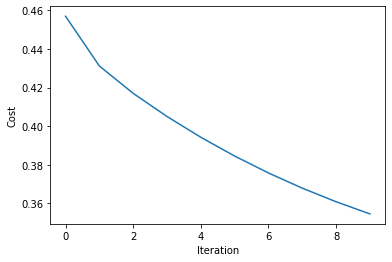

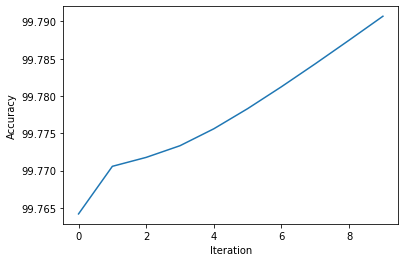

In [326]:
network = Network()
network.gDescent()

# ***Evaluating the model***

In [327]:
predictions, cost, accuracy = network.predict()
print("Final Cost : "+str(cost[0]))
print("Final Accuracy : "+str(accuracy) +"%")

Final Cost : 0.588085399109333
Final Accuracy : 80.44050476032777%
